# Connect Intensive - Machine Learning Nanodegree
# Lesson 6: K-Means Clustering Mini-Project


## Objectives
  - Perform [k-means clustering](http://scikit-learn.org/stable/modules/clustering.html#k-means) on the Enron Data Set.
  - Visualize different clusters that form before and after feature scaling.
  
## Prerequisites
  - You should have the following python packages installed:
    - [matplotlib](http://matplotlib.org/index.html)
    - [numpy](http://www.scipy.org/scipylib/download.html)
    - [pandas](http://pandas.pydata.org/getpandas.html)
    - [sklearn](http://scikit-learn.org/stable/install.html)

## Acknowledgements
  - The content of this notebook builds on the code from [k_means_cluster.py](https://github.com/udacity/ud120-projects/blob/master/k_means/k_means_cluster.py) from the [**ud120-projects**](https://github.com/udacity/ud120-projects) repo.
  

## Get the [final_project_dataset.pkl](https://github.com/udacity/ud120-projects/blob/master/final_project/final_project_dataset.pkl) from the [**ud120-projects**](https://github.com/udacity/ud120-projects) repo. 

Inlcude this file in your lesson_6 folder. 

## K-Means Clustering Mini-Project


In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.
The Enron dataset can be found here.

## Clustering Features

The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

## Import libraries 

In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

import pandas as pd 
from IPython.display import display, Image 



In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2", cluster = None):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])
        
    centers = cluster.cluster_centers_
    for center in centers:
            plt.scatter(center[0],center[1],marker='x',facecolor="r",linewidth=3,s=100)
            
            
    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

    

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project_dataset.pkl", "r") )

### there's an outlier--remove it! "pop" will remove and return the example. 
total = data_dict.pop('TOTAL', 0)

total


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

## Which features does the code use for clustering? 


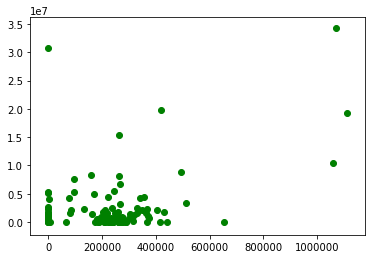

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 

feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


for f1, f2 in finance_features:
    plt.scatter( f1, f2, color = 'g' )
plt.show() 



## Deploying Clustering

Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?


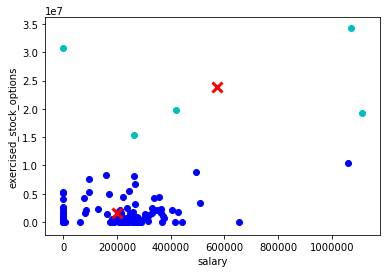

In [5]:
from sklearn.cluster import KMeans 

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

kmeans = KMeans(n_clusters = 2)
kmeans.fit(finance_features)

# pred = kmeans.predict(finance_features) Another method for obtaining predictions
pred = kmeans.labels_



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
### set the Draw() "cluster" parameter to the name of your KMeans model


try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2, cluster = kmeans)
except NameError:
    print "no predictions object named pred found, no clusters to plot"
    


## Clustering with 3 Features


Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.

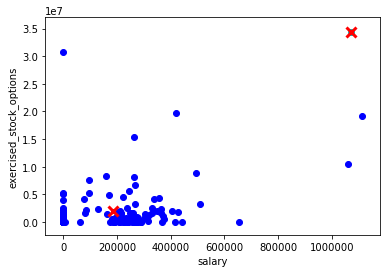

In [6]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"

poi  = "poi"
features_list2 = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list2 )
poi, finance_features2 = targetFeatureSplit( data )


kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(finance_features2)

pred = kmeans2.labels_

try:
    Draw(pred, finance_features2, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2 ,cluster = kmeans2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


## Stock Option Range


In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [7]:
# Create a DataFrame object from the Enron data dictionary
df = pd.DataFrame.from_dict(data_dict)

# Take the transpose (.T) of the Enron DataFrame,
# so that rows of the DataFrame correspond to individuals
df = df.T

print("DataFrame df has been created!")

DataFrame df has been created!


In [8]:
print("exercised_stock_options \nmax:{} \nmin:{}".\
      format(df[~(df["exercised_stock_options"]=="NaN")]["exercised_stock_options"].max(),
             df[~(df["exercised_stock_options"]=="NaN")]["exercised_stock_options"].min()))

exercised_stock_options 
max:34348384 
min:3285


## Salary Range

What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [9]:
print("salary \nmax:{} \nmin:{}".\
      format(df[~(df["salary"]=="NaN")]["salary"].max(),
             df[~(df["salary"]=="NaN")]["salary"].min()))

salary 
max:1111258 
min:477


## Clustering Changes


The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?

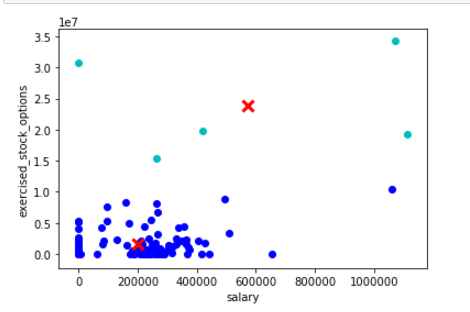

In [10]:
# Clusters before feature rescaling. 

Image('cluster_pic.png')

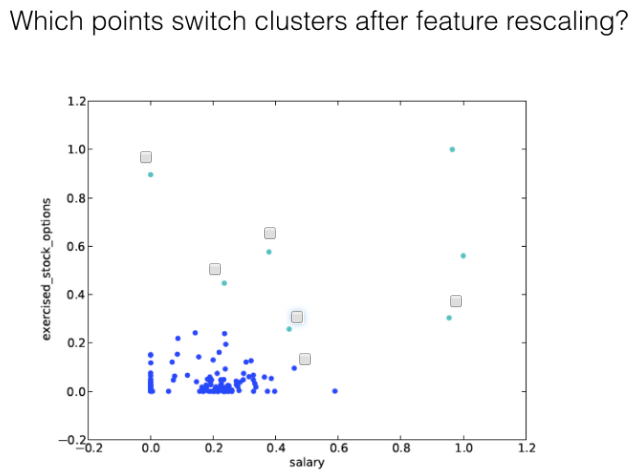

In [11]:
# clusters after feature rescaling.

Image("cluster_pic_feature_rescaling.png")
